In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    f1_score, precision_recall_curve, auc,
    confusion_matrix, classification_report, roc_auc_score
)


In [24]:
df = pd.read_csv("KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [25]:
#map gender
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

In [26]:
#map neighborhood
neighborhood_map = {
    'JARDIM DA PENHA': 0, 'MATA DA PRAIA': 1, 'PONTAL DE CAMBURI': 2,
    'REPÚBLICA': 3, 'GOIABEIRAS': 4, 'ANDORINHAS': 5, 'CONQUISTA': 6,
    'NOVA PALESTINA': 7, 'DA PENHA': 8, 'TABUAZEIRO': 9, 'BENTO FERREIRA': 10,
    'SÃO PEDRO': 11, 'SANTA MARTHA': 12, 'SÃO CRISTÓVÃO': 13, 'MARUÍPE': 14,
    'GRANDE VITÓRIA': 15, 'SANTO ANDRÉ': 16, 'SOLON BORGES': 17, 'BONFIM': 18,
    'JARDIM CAMBURI': 19, 'MARIA ORTIZ': 20, 'JABOUR': 21, 'ANTÔNIO HONÓRIO': 22,
    'RESISTÊNCIA': 23, 'ILHA DE SANTA MARIA': 24, 'JUCUTUQUARA': 25,
    'MÁRIO CYPRESTE': 26, 'SANTO ANTÔNIO': 27, 'BELA VISTA': 28, 'PRAIA DO SUÁ': 29,
    'SANTA HELENA': 30, 'ITARARÉ': 31, 'INHANGUETÁ': 32, 'UNIVERSITÁRIO': 33,
    'SÃO JOSÉ': 34, 'REDENÇÃO': 35, 'SANTA CLARA': 36, 'CENTRO': 37,
    'PARQUE MOSCOSO': 38, 'DO MOSCOSO': 39, 'SANTOS DUMONT': 40, 'CARATOÍRA': 41,
    'ARIOVALDO FAVALESSA': 42, 'ILHA DO FRADE': 43, 'GURIGICA': 44, "JOANA D´ARC": 45,
    'CONSOLAÇÃO': 46, 'SÃO BENEDITO': 47, 'PRAIA DO CANTO': 48, 'BOA VISTA': 49,
    'SANTA LÚCIA': 50, 'BARRO VERMELHO': 51, 'ESTRELINHA': 52, 'FORTE SÃO JOÃO': 53,
    'FONTE GRANDE': 54, 'MORADA DE CAMBURI': 55, 'ENSEADA DO SUÁ': 56,
    'SANTOS REIS': 57, 'PIEDADE': 58, 'JESUS DE NAZARETH': 59, 'SANTA LUÍZA': 60,
    'SANTA TEREZA': 61, 'CRUZAMENTO': 62, 'ILHA DO PRÍNCIPE': 63, 'ROMÃO': 64,
    'ILHA DAS CAIEIRAS': 65, 'COMDUSA': 66, 'SANTA CECÍLIA': 67, 'VILA RUBIM': 68,
    'DE LOURDES': 69, 'MONTE BELO': 70, 'DO QUADRO': 71, 'DO CABRAL': 72,
    'HORTO': 73, 'SEGURANÇA DO LAR': 74, 'ILHA DO BOI': 75, 'FRADINHOS': 76,
    'NAZARETH': 77, 'AEROPORTO': 78, 'ILHAS OCEÂNICAS DE TRINDADE': 79,
    'PARQUE INDUSTRIAL': 80
}

df['Neighbourhood'] = df['Neighbourhood'].map(neighborhood_map)


In [27]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,0,1,0,0,0,0,No
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,0,No
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,1,0,0,0,0,0,0,No
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,2,0,0,0,0,0,0,No
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,0,1,1,0,0,0,No


here we can see there is huge class imbalance

In [28]:
#map target no-show
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})
df['No-show'].value_counts()


No-show
0    88208
1    22319
Name: count, dtype: int64

In [29]:
print(df['No-show'].value_counts())
print(df['No-show'].value_counts(normalize=True))


No-show
0    88208
1    22319
Name: count, dtype: int64
No-show
0    0.798067
1    0.201933
Name: proportion, dtype: float64


# Date columns to datetime and engineer new features

ScheduledDay and AppointmentDay are dates, so I'll convert them to datetime.

Also, I'll add features like:
- Days between scheduling and appointment
- Day of week of scheduling and appointment
- Hour of scheduling
- Whether appointment is booked same day (days_diff == 0)


In [30]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df['Days_diff'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df['ScheduledDayOfWeek'] = df['ScheduledDay'].dt.dayofweek
df['AppointmentDayOfWeek'] = df['AppointmentDay'].dt.dayofweek
df['Hour'] = df['ScheduledDay'].dt.hour
df['SameDayAppointment'] = (df['Days_diff'] == 0).astype(int)

df[['ScheduledDay', 'AppointmentDay', 'Days_diff', 'ScheduledDayOfWeek', 'Hour', 'SameDayAppointment']].head()


,ScheduledDay,AppointmentDay,Days_diff,ScheduledDayOfWeek,Hour,SameDayAppointment
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,-1,4,18,0
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,-1,4,16,0
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,-1,4,16,0
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,-1,4,17,0
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,-1,4,16,0


# we will remove invalid ages and days difference which should bbe positive

I noticed some weird ages <= 0 and negative days difference (probably data entry errors).

Removing those to keep data clean.


In [31]:
print(f"Before cleaning: {len(df)} samples")

df = df[df['Age'] > 0]
df = df[df['Days_diff'] >= 0]

print(f"After cleaning: {len(df)} samples")


Before cleaning: 110527 samples
After cleaning: 69828 samples


# Encode categorical variables

- Gender: map 'F' to 0 and 'M' to 1.
- Neighborhood: frequency encode based on occurrence rate.


In [32]:
df.head(100)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Days_diff,ScheduledDayOfWeek,AppointmentDayOfWeek,Hour,SameDayAppointment
5,9.598513e+13,5626772,0,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,3,0,1,0,0,0,0,0,1,2,4,8,0
6,7.336882e+14,5630279,0,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,4,0,0,0,0,0,0,1,1,2,4,15,0
7,3.449833e+12,5630575,0,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,4,0,0,0,0,0,0,1,1,2,4,15,0
9,7.812456e+13,5629123,0,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,6,0,0,0,0,0,0,0,1,2,4,12,0
10,7.345362e+14,5630213,0,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,7,0,0,0,0,0,0,0,1,2,4,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2.863538e+13,5634224,0,2016-04-28 10:34:34+00:00,2016-04-29 00:00:00+00:00,41,31,0,0,0,0,0,0,1,0,3,4,10,1
157,2.427120e+13,5634239,0,2016-04-28 10:36:10+00:00,2016-04-29 00:00:00+00:00,5,31,0,0,0,0,0,0,0,0,3,4,10,1
158,5.884942e+14,5574391,0,2016-04-12 14:51:09+00:00,2016-04-29 00:00:00+00:00,45,18,0,0,0,0,0,1,0,16,1,4,14,0
159,6.988858e+11,5551288,0,2016-04-06 13:42:36+00:00,2016-04-29 00:00:00+00:00,71,5,0,1,1,0,0,1,0,22,2,4,13,0


# above we can see that for handcap column samples for 2, 3, 4 are very less so we will just convert it to binary 


In [33]:
df['Handcap'] = (df['Handcap'] > 0).astype(int)
df['Handcap'].value_counts()


Handcap
0    68521
1     1307
Name: count, dtype: int64

In [34]:
X = df.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'No-show'])
y = df['No-show'].values

print(X.shape, y.shape)


(69828, 14) (69828,)


perform test train split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(X_train.shape, X_test.shape)


(55862, 14) (13966, 14)


now we will scale the features

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# we are saving data for use in pytorch implementation also

In [50]:
np.save('X_train.npy', X_train_scaled)
np.save('y_train.npy', y_train)
np.save('X_test.npy', X_test_scaled)
np.save('y_test.npy', y_test)

# Build a custom Dense (Fully Connected) Layer

Each layer will handle:
- Weight initialization using He initialization
- Forward pass using dot product
- Backward pass for gradient flow


In [37]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons, l2_lambda=0.0):
        self.weights = np.random.randn(n_inputs, n_neurons) * np.sqrt(2. / n_inputs)
        self.biases = np.zeros((1, n_neurons))
        self.l2_lambda = l2_lambda

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues) + self.l2_lambda * self.weights
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)


# Add ReLU and Sigmoid activation classes

ReLU will be used for hidden layers and Sigmoid for the final output layer (since this is binary classification).


In [38]:
class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0


class Activation_Sigmoid:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = 1 / (1 + np.exp(-inputs))

    def backward(self, dvalues):
        self.dinputs = dvalues * (self.output * (1 - self.output))


# Define Binary Crossentropy Loss (with class weights for imbalance)

We'll use class weights because of the imbalance in no-show vs show.


In [39]:
class Loss_BinaryCrossentropy:
    def __init__(self, class_weights=None):
        self.class_weights = class_weights

    def forward(self, y_pred, y_true):
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        losses = -(y_true * np.log(y_pred_clipped) + (1 - y_true) * np.log(1 - y_pred_clipped))
        if self.class_weights is not None:
            weights = np.where(y_true == 1, self.class_weights[1], self.class_weights[0])
            losses *= weights
        return np.mean(losses)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        y_pred_clipped = np.clip(dvalues, 1e-7, 1 - 1e-7)
        self.dinputs = -(y_true / y_pred_clipped - (1 - y_true) / (1 - y_pred_clipped)) / samples
        if self.class_weights is not None:
            weights = np.where(y_true == 1, self.class_weights[1], self.class_weights[0])
            self.dinputs *= weights


# NN strcture - note that i did not know what the structure should be to be most optimised so i searched on gpt and therefore i am going with the following nn structure i had also tried an 8, 8 hidden layer structure but thatt gave me 32 percent accuracy

input layer -> 14 features

hidden layer 1 -> 64 neurons -> relu activation

hidden layer 2 -> 32 neurons -> relu activation

output layer -> 1 neuron -> sigmoid activation

In [40]:
n_features = X_train_scaled.shape[1]
dense1 = Layer_Dense(n_features, 64, l2_lambda=1e-4)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 32, l2_lambda=1e-4)
activation2 = Activation_ReLU()
dense3 = Layer_Dense(32, 1, l2_lambda=1e-4)
activation3 = Activation_Sigmoid()


In [49]:
print(n_features)

14


as we saw above there is huge class imbalance therefore we will multiply class 1 weights by 2 so that its influence in training increases


In [41]:
neg, pos = np.bincount(y_train)
total = neg + pos
class_weights = {0: 1.0, 1: total / (2.0 * pos)}
loss_function = Loss_BinaryCrossentropy(class_weights)


test train split

In [42]:
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

epochs = 200
learning_rate = 0.0008
batch_size = 256


we will train the network in batches and update weights with manual gradient descent

# note that this code is largly reffered from sentdex nnfs playlist

In [43]:
# initialise lists to save losses and scores for furthur use while plotting graphs
train_losses = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_pr_aucs = []

# Training loop
for epoch in range(epochs):
    permutation = np.random.permutation(len(X_train_final))
    X_shuffled = X_train_final[permutation]
    y_shuffled = y_train_final[permutation]

    epoch_loss = 0
    num_batches = int(np.ceil(len(X_train_final) / batch_size))

    for batch_idx in range(num_batches):
        start = batch_idx * batch_size
        end = min(start + batch_size, len(X_train_final))

        X_batch = X_shuffled[start:end]
        y_batch = y_shuffled[start:end]

        # Forward pass
        dense1.forward(X_batch)
        activation1.forward(dense1.output)
        dense2.forward(activation1.output)
        activation2.forward(dense2.output)
        dense3.forward(activation2.output)
        activation3.forward(dense3.output)

        # Loss calculation
        batch_loss = loss_function.forward(activation3.output.flatten(), y_batch)
        epoch_loss += batch_loss

        # Backward pass
        loss_function.backward(activation3.output.flatten(), y_batch)
        activation3.backward(loss_function.dinputs.reshape(-1, 1))
        dense3.backward(activation3.dinputs)
        activation2.backward(dense3.dinputs)
        dense2.backward(activation2.dinputs)
        activation1.backward(dense2.dinputs)
        dense1.backward(activation1.dinputs)

        # Weight update
        for layer in [dense1, dense2, dense3]:
            layer.weights -= learning_rate * layer.dweights
            layer.biases -= learning_rate * layer.dbiases

    # Validation pass
    dense1.forward(X_val)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    dense3.forward(activation2.output)
    activation3.forward(dense3.output)

    val_probs = activation3.output.flatten()
    val_preds = (val_probs > 0.5).astype(int)

    val_loss = loss_function.forward(val_probs, y_val)
    val_acc = np.mean(val_preds == y_val)
    val_f1 = f1_score(y_val, val_preds)
    precision, recall, _ = precision_recall_curve(y_val, val_probs)
    val_pr_auc = auc(recall, precision)

    # Append to metrics
    train_losses.append(epoch_loss / num_batches)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(val_f1)
    val_pr_aucs.append(val_pr_auc)

    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch + 1}: Train Loss={train_losses[-1]:.4f} | Val Loss={val_loss:.4f} | Val Acc={val_acc:.4f} | F1={val_f1:.4f} | PR AUC={val_pr_auc:.4f}")


Epoch 1: Train Loss=1.0586 | Val Loss=1.0037 | Val Acc=0.4937 | F1=0.3415 | PR AUC=0.2652
Epoch 11: Train Loss=0.8514 | Val Loss=0.8588 | Val Acc=0.6260 | F1=0.2700 | PR AUC=0.2963
Epoch 21: Train Loss=0.8308 | Val Loss=0.8376 | Val Acc=0.6538 | F1=0.2652 | PR AUC=0.3149
Epoch 31: Train Loss=0.8235 | Val Loss=0.8297 | Val Acc=0.6620 | F1=0.2596 | PR AUC=0.3244
Epoch 41: Train Loss=0.8198 | Val Loss=0.8255 | Val Acc=0.6653 | F1=0.2562 | PR AUC=0.3296
Epoch 51: Train Loss=0.8172 | Val Loss=0.8229 | Val Acc=0.6675 | F1=0.2503 | PR AUC=0.3328
Epoch 61: Train Loss=0.8154 | Val Loss=0.8211 | Val Acc=0.6708 | F1=0.2466 | PR AUC=0.3349
Epoch 71: Train Loss=0.8140 | Val Loss=0.8196 | Val Acc=0.6714 | F1=0.2451 | PR AUC=0.3367
Epoch 81: Train Loss=0.8129 | Val Loss=0.8185 | Val Acc=0.6740 | F1=0.2469 | PR AUC=0.3383
Epoch 91: Train Loss=0.8121 | Val Loss=0.8175 | Val Acc=0.6774 | F1=0.2448 | PR AUC=0.3397
Epoch 101: Train Loss=0.8114 | Val Loss=0.8167 | Val Acc=0.6782 | F1=0.2423 | PR AUC=0.3409

now we will calculate-
Accuracy,
F1 Score,
ROC AUC,
PR AUC,
Confusion Matrix,
Classification Report


In [44]:
dense1.forward(X_test_scaled)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
dense3.forward(activation2.output)
activation3.forward(dense3.output)

test_preds = (activation3.output.flatten() > 0.5).astype(int)
test_probs = activation3.output.flatten()


evaluation metrics

In [45]:
print("\nFinal Evaluation")
print(f"Accuracy: {np.mean(test_preds == y_test):.4f}")
print(f"F1 Score: {f1_score(y_test, test_preds):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, test_probs):.4f}")

from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test, test_probs)
print(f"PR AUC: {auc(recall, precision):.4f}")



Final Evaluation
Accuracy: 0.6839
F1 Score: 0.2524
ROC AUC: 0.5888
PR AUC: 0.3525


# Confusion Matrix and Classification Report


In [46]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, test_preds))

print("\nClassification Report:")
print(classification_report(y_test, test_preds))


Confusion Matrix:
[[8807 1172]
 [3242  745]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80      9979
           1       0.39      0.19      0.25      3987

    accuracy                           0.68     13966
   macro avg       0.56      0.53      0.53     13966
weighted avg       0.63      0.68      0.64     13966



## Visualisation


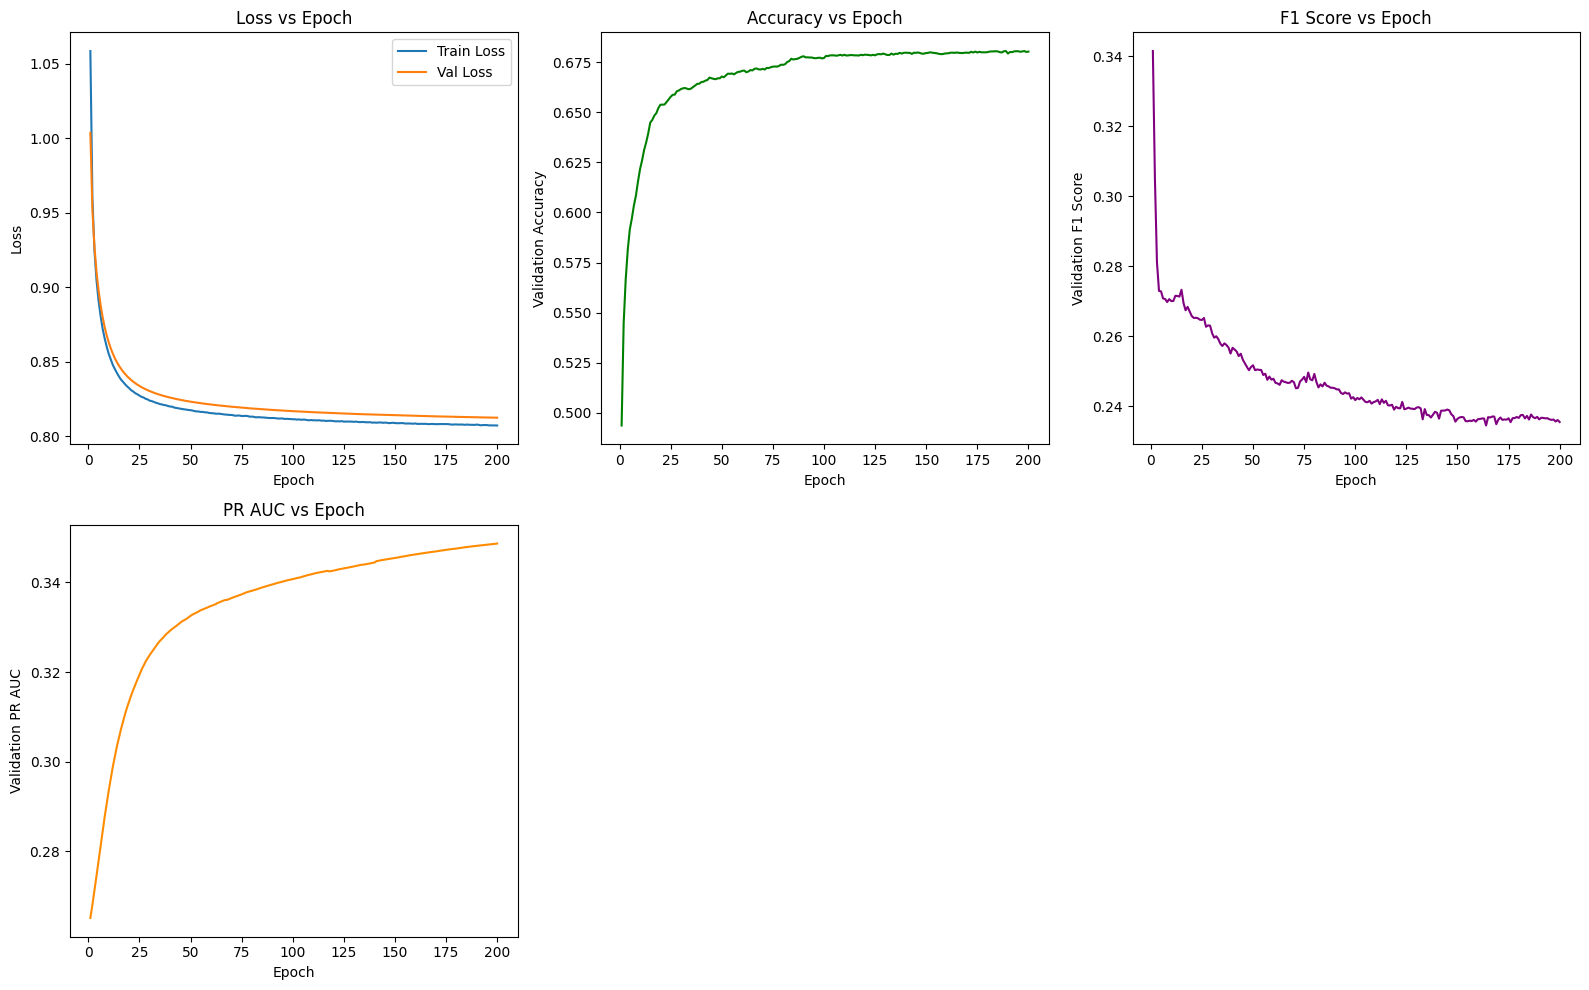

In [47]:
import matplotlib.pyplot as plt

epochs_range = range(1, epochs + 1)

plt.figure(figsize=(16, 10))

# Loss
plt.subplot(2, 3, 1)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()

# Accuracy
plt.subplot(2, 3, 2)
plt.plot(epochs_range, val_accuracies, color='green')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Accuracy vs Epoch')

# F1 Score
plt.subplot(2, 3, 3)
plt.plot(epochs_range, val_f1_scores, color='purple')
plt.xlabel('Epoch')
plt.ylabel('Validation F1 Score')
plt.title('F1 Score vs Epoch')

# PR AUC
plt.subplot(2, 3, 4)
plt.plot(epochs_range, val_pr_aucs, color='darkorange')
plt.xlabel('Epoch')
plt.ylabel('Validation PR AUC')
plt.title('PR AUC vs Epoch')

plt.tight_layout()
plt.show()


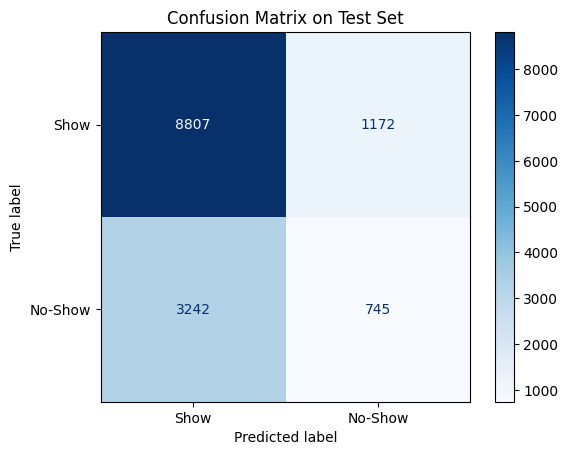

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

# on test data
dense1.forward(X_test_scaled)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
dense3.forward(activation2.output)
activation3.forward(dense3.output)

test_preds = (activation3.output.flatten() > 0.5).astype(int)

# condusion matrix
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Show", "No-Show"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Test Set")
plt.show()
